# MDI341: TP Graphs

**Warning**: Ce Notebook à été conçu pour fonctionner avec NetworkX 2.2

In [1]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import os.path
import urllib
import tarfile

In [2]:
print("Version de NetworkX: ", nx.__version__)

Version de NetworkX:  2.1


**Note** : la documentation de NetworkX se trouve [ici](http://networkx.readthedocs.io/)

## Analyse de graphes

### Erdős-Rényi

#### Question 1

On commence par créer et visualiser un graphe de type Erdős-Rényi avec n=200 noeuds et p=0.04. Vous aurez besoin des fonctions `nx.erdos_renyi_graph` et `nx.draw`.

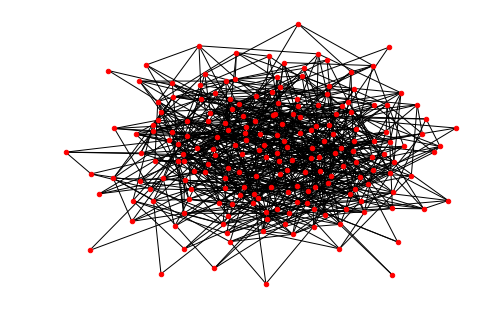

In [3]:
n = 200
p = 0.04
G_erdos = nx.erdos_renyi_graph(n, p)
nx.draw(G_erdos,node_size=20)


#### Question 2

Calculons des statistiques sur le nombre d'arêtes et la distribution des degrés.

In [5]:
degree_sequence_erdos = np.array(G_erdos.degree)[:,1]
print(f"nombre de noeuds {G_erdos.number_of_nodes()}")
print(f"nombre d'arrêtes {G_erdos.number_of_edges()}")
print(f"Le degré moyen est {np.mean(degree_sequence_erdos):.2f}")
print(f"A comparer au degré moyen théorique np =  {n*p}")
print(f"L'écart type des degré est {np.std(degree_sequence_erdos):.2f}")
print(f"A l'écart type théorique {np.sqrt(n*p*(1-p)):.2f}")
print(f"Le degré médian est {np.median(degree_sequence_erdos)}")
print(f"Le degré minimal est {np.min(degree_sequence_erdos)}")
print(f"Le degré maximal est {np.max(degree_sequence_erdos)}")

nombre de noeuds 200
nombre d'arrêtes 808
Le degré moyen est 8.08
A comparer au degré moyen théorique np =  8.0
L'écart type des degré est 2.78
A l'écart type théorique 2.77
Le degré médian est 8.0
Le degré minimal est 2
Le degré maximal est 16


Les résulats mesurés sont très proche de ce que l'on pouvait prévoirs:<br>
-Le degrès moyen est très proche de l'espérance théorique du degrès.<br>
-Le degrés médian est à peu près le même que le degrès moyen ce qui est normal pour une répartition binomiale (symétrique).<br>
-Le degrès maximal reste faible et du même ordre que le degrès moyen.

#### Question 3

On trace la distribution des degrés en échelle normale, puis en échelle log-log. La fonction `nx.degree_histogram` vous sera utile.

Text(0.5,0,'log-Degre')

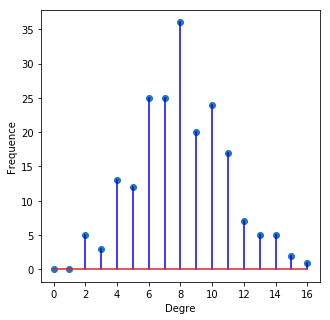

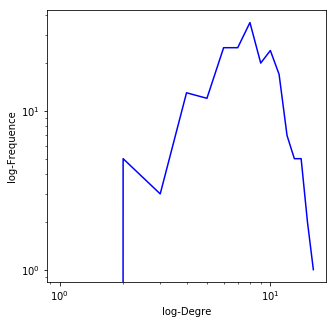

In [6]:
degree_freq = nx.degree_histogram(G_erdos)

plt.figure(figsize=(5, 5))
plt.stem(degree_freq, linefmt='b-')
plt.ylabel("Frequence")
plt.xlabel("Degre")

plt.figure(figsize=(5, 5))
plt.loglog(degree_freq, 'b-')
plt.ylabel("log-Frequence")
plt.xlabel("log-Degre")

Comme attendu, la distribution des degrés suit une loi binomiale.<br>
Les degrès sont très concentrés autour de la moyenne.<br>
La probabilité d'avoir un degrés élevé décroit de façon exponentielle.

#### Question 4

On calcule maintenant le coefficient de clustering global (voir `nx.clustering`)

In [7]:
# On calcul les coefficients locaux de chaque noeud
clustering_local = nx.clustering(G_erdos)
# On calcul la moyenne globale des coefficients de clustering
clustering_global = np.mean(list(clustering_local.values()))
print(f"Le coefficient de clustering global est {clustering_global:.4f}")
print(f"A comparer avec la théorie : p =   {p}")

Le coefficient de clustering global est 0.0398
A comparer avec la théorie : p =   0.04


Le coefficient de clustering global est très proche de ce qui est attendu par la théorie.<br>
Dans un graph de Erdős-Rényi, les noeuds ne forment pas de clusters.

#### Question 5

On affiche la longueur moyenne des plus courts chemins et le diamètre du graphe

In [8]:
print(f"La longueur moyenne des plus court chemin est {nx.average_shortest_path_length(G_erdos):.2f}")
print(f"Le diamètre du graph est {nx.diameter(G_erdos)}")

La longueur moyenne des plus court chemin est 2.76
Le diamètre du graph est 5


Le diamètre du graph est de 5, ce qui est faible par rapport à la taille du graph : 200 noeuds.<br>
On peut considérer qu'on a un phénomène "petit monde".

### Barabási–Albert

#### Question 6

On crée et visualise maintenant un graphe de Barabási–Albert avec n=200 noeuds (on ajoute à chaque fois m=3 arêtes), puis on applique la même analyse que celle faite pour Erdős-Rényi

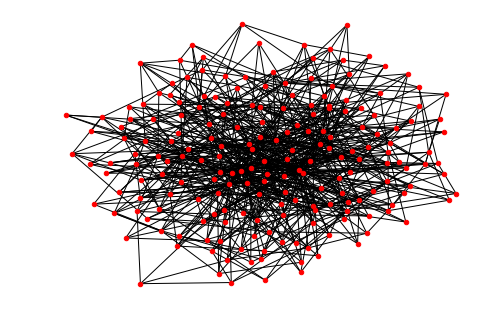

In [9]:
n = 200
m = 4
G_barabasi = nx.barabasi_albert_graph(n,m)

nx.draw(G_barabasi,node_size=20)

#### Statistiques sur les degrès

In [10]:
degree_sequence_barabasi = np.array(G_barabasi.degree)[:,1]
print(f"nombre de noeuds {G_barabasi.number_of_nodes()}")
print(f"nombre d'arrêtes {G_barabasi.number_of_edges()}")
print(f"Le degrés moyen est {np.mean(degree_sequence_barabasi):.2f}")
print(f"L'écart type des degrés est {np.std(degree_sequence_barabasi):.2f}")
print(f"Le degré médian est {np.median(degree_sequence_barabasi)}")
print(f"Le degré minimal est {np.min(degree_sequence_barabasi)}")
print(f"Le degré maximal est {np.max(degree_sequence_barabasi)}")

nombre de noeuds 200
nombre d'arrêtes 784
Le degrés moyen est 7.84
L'écart type des degrés est 6.75
Le degré médian est 5.0
Le degré minimal est 4
Le degré maximal est 48


Le nombre de noeuds du graph est le même que celui du graph précédent. Les nombres d'arrêtes sont très proches, c'est une situation idéale pour comparer les graphs.<br>
Le degrès moyen est sensiblement le même pour les 2 graphs.<br>

Toutefois, on remarque que le degrès médian est plus élevé que le degrès moyen, ce qui témoigne d'une asymétrie dans la répartition des degrès. <br>
L'écart-type et le degrès maximal sont plus élevés. Il y a donc plus de noeuds avec un degrès élevé que dans le cas du graph Erdős-Rényi.<br>
Ceci est cohérent, car la distribution des degrès dans un graph Barabási–Albert suit une loi de puissance qui est loi à queue lourde.

#### Distribution des degrès

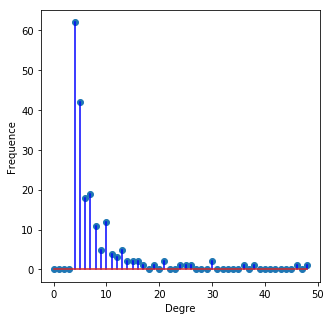

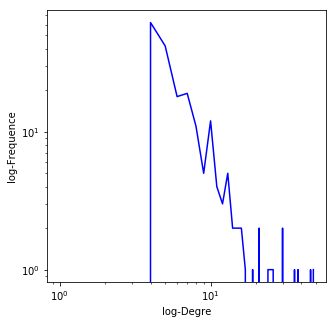

In [11]:
degree_freq = nx.degree_histogram(G_barabasi)

plt.figure(figsize=(5, 5))
plt.stem(degree_freq, linefmt='b-')
plt.ylabel("Frequence")
plt.xlabel("Degre")

plt.figure(figsize=(5, 5))
plt.loglog(degree_freq, 'b-')
plt.ylabel("log-Frequence")
plt.xlabel("log-Degre");

La distribution des degrès suit une loi de puissance.<br>
Il y a plus de noeuds avec un degrés élevé que dans un graph de Erdős-Rényi.

#### Coefficient de clustering

In [12]:
clustering_local = nx.clustering(G_barabasi)
clustering_global = np.mean(list(clustering_local.values()))
print(f"Le coefficient de clustering global est {clustering_global:.4f}")
#print(f"A comparer avec la théorie : p =   {p}")

Le coefficient de clustering global est 0.1121


Le coefficient de clustering est plus de deux fois plus élevé que dans le cas Erdős-Rényi. Ainsi les noeuds forment plus facilement des clusters dans un graph de Barabási–Albert.<br> 

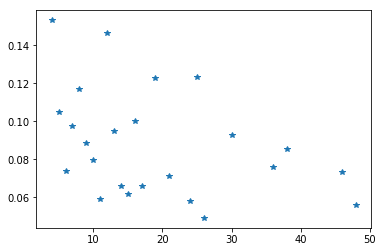

In [13]:
clustering_local = np.array(list(nx.clustering(G_barabasi).values()))
degree_sequence_barabasi = np.array(G_barabasi.degree)[:,1]


clustering_coeff = []


for k in set(degree_sequence_barabasi):
    clustering_coeff.append(clustering_local[degree_sequence_barabasi==k].mean())
    
plt.plot(list(set(degree_sequence_barabasi)),clustering_coeff,'*')

In [13]:
print(f"La longueur moyenne des plus court chemin est {nx.average_shortest_path_length(G_barabasi):.2f}")
print(f"Le diamètre du graph est {nx.diameter(G_barabasi)}")

La longueur moyenne des plus court chemin est 2.75
Le diamètre du graph est 5


Le diamètre du graph est de 5, ce qui est faible par rapport à la taille du graph : 200 noeuds.<br>
On peut considérer qu'on a un phénomène "petit monde".

## Graphe Karate Club

On va maintenant travailler sur un graphe réel de petite taille (n=34, m=78) qui représente les liens d'amitié entre les adhérents d'un club de karaté (le graphe est intégré à la librairie `networkx`)

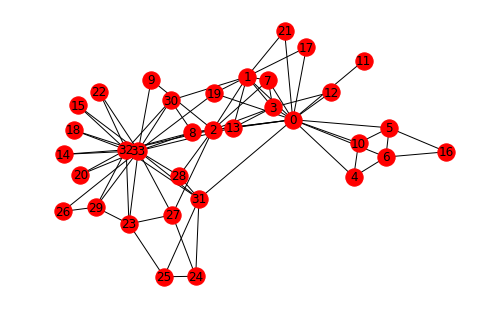

In [14]:
n=34
G_karate = nx.karate_club_graph()

# on définit une position des noeuds qui peut être ré-utilisée plusieurs fois
# en appelant la fonction nx.draw avec l'option pos=pos
pos = nx.spring_layout(G_karate)
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)

#### Question 7

On va appliquer un clustering hiérarchique pour faire de la détection de communauté. On calcule d'abord la matrice des distances entre noeuds, où la distance entre 2 noeuds correspond à la longueur du plus court chemin

In [15]:
# le code suivant calcule une matrice de taille n x n
# distances[i, j] contient la longueur du plus court chemin entre les noeuds i et j
pcc_longueurs=dict(nx.all_pairs_shortest_path_length(G_karate))
distances=np.zeros((n,n))

for i in range(n):
    for j in range(n):
        distances[i, j] = pcc_longueurs[i][j]

On peut maintenant utiliser l'implémentation de clustering hiérarchique ascendant de `scikit-learn` avec le *lien moyen* comme mesure de dissimilarité entre clusters. On affiche tout d'abord le clustering à 4 clusters

#### 4 Clusters

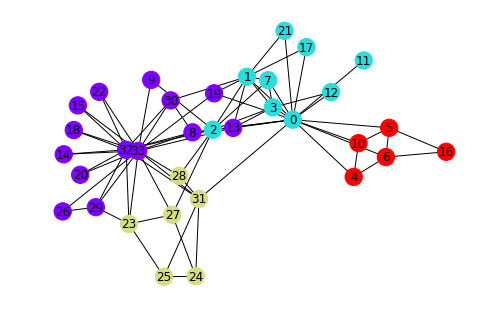

In [16]:
from sklearn.cluster import AgglomerativeClustering
# TODO QUESTION 7
# 
aglo_clust = AgglomerativeClustering(n_clusters=4, linkage="average", affinity="precomputed")
# On applique la méthode AgglomerativeClustering sur la matrice des distances
clusters = aglo_clust.fit_predict(distances)
# On affiche le résultats, chaque couleur du graph correspond à un cluster
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos, node_color=clusters)

#### 2 Clusters

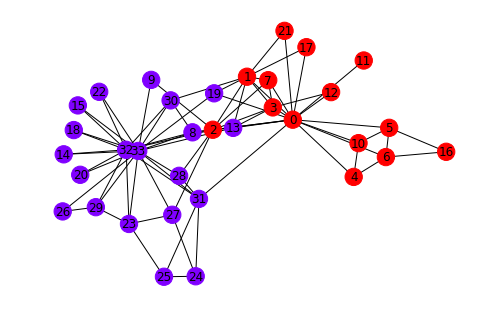

In [17]:
aglo_clust = AgglomerativeClustering(n_clusters=2, linkage="average", affinity="precomputed")
X =  np.arange(34).reshape(-1,1)
clusters = aglo_clust.fit_predict(distances)
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos, node_color=clusters)

On retrouve deux communautés, qui semblent se regouper autours de noeuds centraux  :0 pour la couleur rouge et 33 pour la couleur violette.

#### Question 8

On va mettre en évidence visuellement les différences entre quelques mesures de centralité des noeuds

Text(0.5,1,"Centralite d'intermediarite")

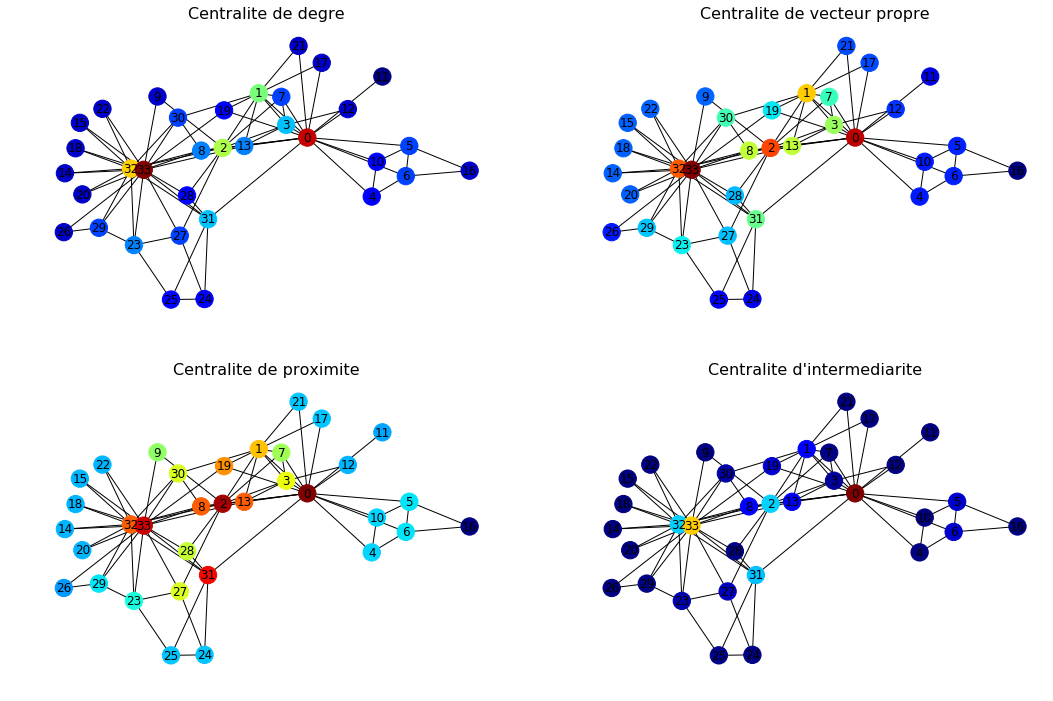

In [18]:
c_degree = list(nx.degree_centrality(G_karate).values())
c_eigenvector = list(nx.eigenvector_centrality(G_karate).values())
c_closeness = list(nx.closeness_centrality(G_karate).values())
c_betweenness = list(nx.betweenness_centrality(G_karate).values())

plt.figure(figsize=(18, 12))
f, axarr = plt.subplots(2, 2, num=1)
plt.sca(axarr[0,0])
nx.draw(G_karate, cmap = plt.get_cmap('jet'), node_color = c_degree, node_size=300, pos=pos, with_labels=True)
axarr[0,0].set_title('Centralite de degre', size=16)

plt.sca(axarr[0,1])
nx.draw(G_karate, cmap = plt.get_cmap('jet'), node_color = c_eigenvector, node_size=300, pos=pos, with_labels=True)
axarr[0,1].set_title('Centralite de vecteur propre', size=16)

plt.sca(axarr[1,0])
nx.draw(G_karate, cmap = plt.get_cmap('jet'), node_color = c_closeness, node_size=300, pos=pos, with_labels=True)
axarr[1,0].set_title('Centralite de proximite', size=16)

plt.sca(axarr[1,1])
nx.draw(G_karate, cmap = plt.get_cmap('jet'), node_color = c_betweenness, node_size=300, pos=pos, with_labels=True)
axarr[1,1].set_title('Centralite d\'intermediarite', size=16)


**Centralité de degrés**:<br>
Est considéré comme central, un noeuds qui à beaucoup de voisins direct. On retrouve les noeuds 0 et 33 qui ont un degrès élevé.<br> 
**Centralité de vecteur propre**:<br>
Est considéré comme central, un noeuds qui est proche d'un noeud central. Ainsi le noeud 2, est considéré comme central car proche des noeuds 33 et 0.<br>
**Centralité de proximité**:
Est considéré comme centrale un noeuds qui proche de tous les autres noeuds. On remarque que à l'inverse des critère précédents, le noeuds 2 est plus central que le noeud 33. En effet le noeud 33 à une distance en plus court chemin trop grande avec les noeuds du "haut".<br>
**Centralité d'intermédiaire**:<br>
Un noeud est dit central quand il est un passage "obligé" entre deux autres noeuds. Le noeud 0 est central, en effet il est l'unique point de jonction avec certaines parties du graph (ex: {16,5,6,10,4}). Au contraire de 33 qui peut être contourné (souvent en passant par 32).

### Graphe des produits Amazon

#### Question 9 (bonus +2 pts)

On va maintenant étudier un graphe de grande taille dont les noeuds sont des produits vendus par Amazon, et deux noeuds sont connectés si les deux produits sont fréquemment achetés ensemble (plus de détails [ici](https://snap.stanford.edu/data/com-Amazon.html))

In [21]:
#if os.path.exists('amazon.txt.gz') is False:
#    resp = urllib.urlretrieve('https://snap.stanford.edu/data/bigdata/' +
#                               'communities/com-amazon.ungraph.txt.gz', 'amazon.txt.gz')

G_amazon = nx.read_edgelist('amazon.txt.gz')

#### Statistiques sur les degrès

In [22]:
degree_sequence_amazon = np.array(G_amazon.degree)[:,1].astype('int32')
print(f"nombre de noeuds {G_amazon.number_of_nodes()}")
print(f"nombre d'arrêtes {G_amazon.number_of_edges()}")
print(f"Le degrés moyen est {np.mean(degree_sequence_amazon):.2f}")
print(f"L'écart type des degrés est {np.std(degree_sequence_amazon):.2f}")
print(f"Le degré médian est {np.median(degree_sequence_amazon)}")
print(f"Le degré minimal est {np.min(degree_sequence_amazon)}")
print(f"Le degré maximal est {np.max(degree_sequence_amazon)}")

nombre de noeuds 334863
nombre d'arrêtes 925872
Le degrés moyen est 5.53
L'écart type des degrés est 5.76
Le degré médian est 4.0
Le degré minimal est 1
Le degré maximal est 549


Avec :
 - un écart-type proche de la valeur moyenne du degrès 
 - un degrès médian plus faible que le degrès moyen
 - un degrès maximal très nettement supèrieur au degrès moyen (même au regard de l'écart-type<br>
Le graph des produits d'Amazon s'approche de ce que l'on obtenait sur un graph de Barabási–Albert que d'un graph de  Erdős-Rényi

#### Distribution des degrés

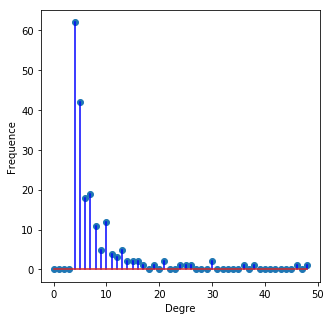

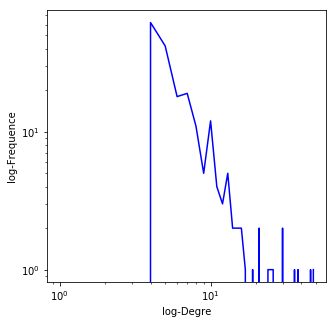

In [23]:
egree_freq = nx.degree_histogram(G_amazon)

plt.figure(figsize=(5, 5))
plt.stem(degree_freq, linefmt='b-')
plt.ylabel("Frequence")
plt.xlabel("Degre")

plt.figure(figsize=(5, 5))
plt.loglog(degree_freq, 'b-')
plt.ylabel("log-Frequence")
plt.xlabel("log-Degre");

On retrouve les courbe d'une distrution en puissance. Ceci conforte l'idée que ce graph est un graph de Barabási–Albert.

Si le graph des produits d'Amazon suit une structure de Barabási–Albert alors certains de ces noeuds sont des hubs.<br>
Ceux-ci correspondent à des produits achetés en même temps que de nombreux produits. Ils s'agit surement de produits "accessoires" indispensable au fonctionnement du produits voulu (ex: piles).

#### Coefficient de clustering

In [24]:
clustering_local = nx.clustering(G_amazon)
clustering_global = np.mean(list(clustering_local.values()))
print(f"Le coefficient de clustering global est {clustering_global:.4f}")

Le coefficient de clustering global est 0.3967


On trouve un coefficient de clustering global élevé. <br>
Les produits Amazon forment facilement des clusters.<br>

Ces clusters correspondent surement aux différentes catégories de produits sur amazon.

#### Clustering moyen en fonction du degré des noeuds

In [25]:
# liste des coefficients de clustering de chaque noeud
clustering_local = np.array(list(nx.clustering(G_amazon).values()))
# liste des degrès de clustering de chaque noeud
degree_sequence_amazon = np.array(G_amazon.degree)[:,1]


clustering_coeff = []


for k in set(degree_sequence_amazon):
    # moyenne des coefficients de clustering des noeuds de degrès k
    clustering_coeff.append(clustering_local[degree_sequence_amazon==k].mean())

/home/cindy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


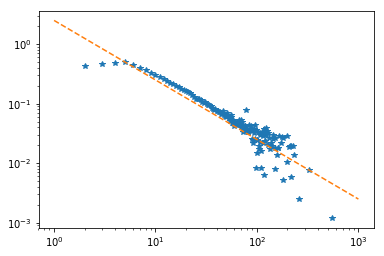

In [26]:
plt.loglog(np.array(list(set(degree_sequence_amazon))).astype('int32'),clustering_coeff,'*')
plt.loglog(np.linspace(0,1000,1000),2.5/np.linspace(0,1000,1000),'--')


On retrouve que C(k) est proportionnel à $\frac{1}{k}$, ce qui est conforme avec un graph de Barabási–Albert.

## Prédiction dans les graphes

Un *ego-network* est un sous-graphe d'un réseau social centré sur un utilisateur. Ici on va travailler avec un ego-network Facebook (téléchargeable [ici](https://snap.stanford.edu/data/egonets-Facebook.html)) qui représente les amis d'un utilisateur donné (sans ce dernier) et les liens d'amitié entre eux. Le jeu de données contient 10 ego-networks, on va travailler avec l'un d'entre eux seulement qui se prête bien à la visualisation.

Nombre de noeuds: 150
Nombre d'arêtes: 1693
Nombre de composantes connexes: 2


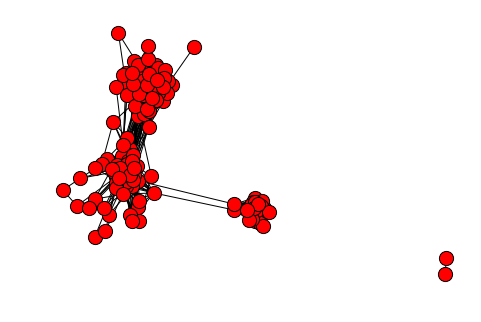

In [27]:
# if os.path.exists('facebook.tar.gz') is False:
#     resp = urllib.urlretrieve('https://snap.stanford.edu/data/facebook.tar.gz',
#                               'facebook.tar.gz')
tarfile.open("facebook.tar.gz", 'r:gz').extractall('.')

G_fb = nx.read_edgelist("facebook/414.edges")
n = G_fb.number_of_nodes()
m = G_fb.number_of_edges()
# on renumérote les noeuds de 0 à n-1
mapping=dict(zip(G_fb.nodes(), range(n)))
nx.relabel_nodes(G_fb, mapping, copy=False)
pos = nx.spring_layout(G_fb)
nx.draw(G_fb, node_size=200, pos=pos)
plt.gca().collections[0].set_edgecolor("#000000") # set node border color to black
print("Nombre de noeuds: %d" % n)
print("Nombre d'arêtes: %d" % m)
print("Nombre de composantes connexes: %d" % nx.number_connected_components(G_fb))

#### Question 10

On va maintenant essayer de prédire des liens dans le réseau. Pour cela, on commence par extraire une proportion des arêtes du graphe, dont on cherchera à prédire l'existence parmi toutes les arêtes non-existantes possibles. Le graphe d'apprentissage est le graphe original auquel on retire les arêtes sélectionnées.

In [105]:
# G_fb_train est une copie du graphe original
# auquel on a retiré 20% des arêtes choisies aléatoirement

proportion_edges = 0.2
edge_subset = random.sample(G_fb.edges(),
                            int(proportion_edges * G_fb.number_of_edges()))
G_fb_train = G_fb.copy()
G_fb_train.remove_edges_from(edge_subset)

edge_subset_size = len(list(edge_subset))
print("Nombre d'arêtes retirées: %d" % edge_subset_size)
print("Nombre d'arêtes restantes: %d" % (m - edge_subset_size))
print("Nombre total d'arêtes non-existantes: %d" %
      len(list(nx.non_edges(G_fb_train))))

Nombre d'arêtes retirées: 338
Nombre d'arêtes restantes: 1355
Nombre total d'arêtes non-existantes: 9820


On veut scorer les arêtes non-existantes de façon à ce que les arêtes réelles retirées aient un plus grand score. On utilise plusieurs mesures de similarité entre paires de noeud et on calcule l'Aire sous la Courbe ROC (AUC). On trace également les courbes ROC pour chaque similarité.

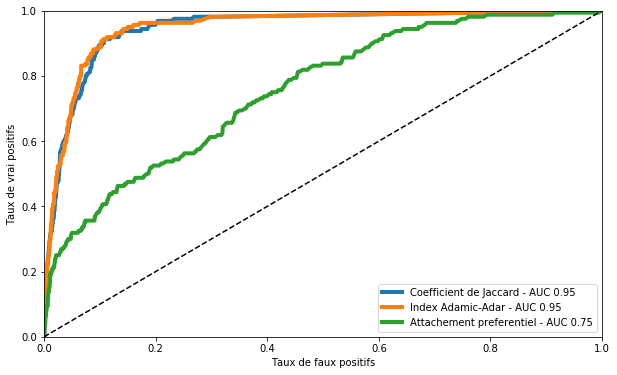

In [106]:
# exemple qui génère les scores et les labels (vrai arête ou fausse arête) avec jaccard
pred_jaccard = list(nx.jaccard_coefficient(G_fb_train))
score_jaccard, label_jaccard = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_jaccard])

# On calcul le taux de faux positif et de vrais positif
fpr_jaccard, tpr_jaccard,_ = metrics.roc_curve(label_jaccard,score_jaccard)
# Calcul de l'aire sous la courbe
auc_jaccard = metrics.auc(fpr_jaccard, tpr_jaccard)


# exemple qui génère les scores et les labels (vrai arête ou fausse arête) avec adamic
pred_adamic = list(nx.adamic_adar_index(G_fb_train))
score_adamic, label_adamic = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_adamic])

#
fpr_adamic, tpr_adamic,_ = metrics.roc_curve(label_adamic,score_adamic)
auc_adamic = metrics.auc(fpr_adamic, tpr_adamic)

# exemple qui génère les scores et les labels (vrai arête ou fausse arête) avec Attachement préférentiel
pred_pref = list(nx.preferential_attachment(G_fb_train))
score_pref, label_pref = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_pref])

#
fpr_pref, tpr_pref,_ = metrics.roc_curve(label_pref,score_pref)
auc_pref = metrics.auc(fpr_pref, tpr_pref)

# afficher ROC curve et AUC
plt.figure(figsize=(10, 6))
plt.plot(fpr_jaccard, tpr_jaccard, label='Coefficient de Jaccard - AUC %.2f' % auc_jaccard, linewidth=4)
plt.plot(fpr_adamic, tpr_adamic, label='Index Adamic-Adar - AUC %.2f' % auc_adamic, linewidth=4)
plt.plot(fpr_pref, tpr_pref, label='Attachement preferentiel - AUC %.2f' % auc_pref, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrai positifs')
plt.legend(loc='lower right')
plt.show()

Le coefficient de Jaccard et l'index d'Adamar-Adar ont des performance similaires et nettement supérieur à l'attachement préférentiel, (AUC 0.96 vs AUC 0.70) 

Le coefficient de Jaccard et l'index d'Adamar-Adar traduisent l'idée : "les amis de mes amis sont mes amis".<br>
Alors que l'attachement préférentiel traduirait l'idée que les liens se forment de manière préférentielle avec les personnes qui ont déjà beaucoup de liens.<br>
Au vu des résultats sur la prédiction des liens, sur Facebook, il semble que liens se forment plutôt selon la logique "les amis de mes amis sont mes amis".

#### Question 11

On va maintenant faire de la classification semi-supervisée des noeuds. Pour cela on va utiliser les attributs qui sont fournis avec l'ego-network. Ces attributs représentent des caractéristiques (anonymisées) des utilisateurs du réseau. Dans la suite nous allons utiliser l'attribut `43` qui vaut `+1` (rouge) si la personne a étudié dans une école donnée, et `-1` (bleu) sinon.

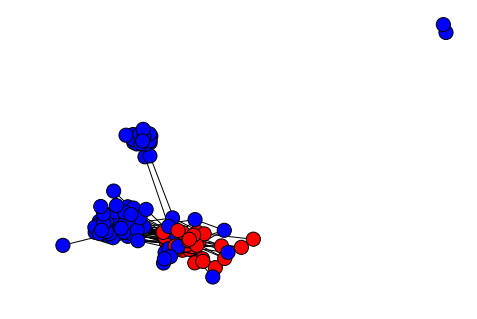

In [107]:
# on charge les labels des noeuds et on les affiche

with open('facebook/414.featnames') as f:
    for i, l in enumerate(f):
        pass

n_feat = i+1

features = np.zeros((n, n_feat))
f = open('facebook/414.feat', 'r')
for line in f:
    if line.split()[0] in mapping:
        node_id = mapping[line.split()[0]]
        features[node_id, :] = list(map(int, line.split()[1:]))

features = 2*features-1
feat_id = 43
labels = features[:, feat_id]

nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = labels, node_size=200, pos=pos)
plt.gca().collections[0].set_edgecolor("#000000") # set node border color to black

On voit que cet attribut est relativement lisse sur le graphe, il se prête donc bien à la classification par propagation de label (ce n'est pas le cas de tous les attributs!). On va donc sélectionner aléatoirement une petite proportion de noeuds pour lesquels nous aurons accès aux labels. Notre tâche sera d'utiliser ces noeuds étiquetés ainsi que la structure du graphe pour prédire le label des autres noeuds. On regarde d'abord les noeuds étiquetés.

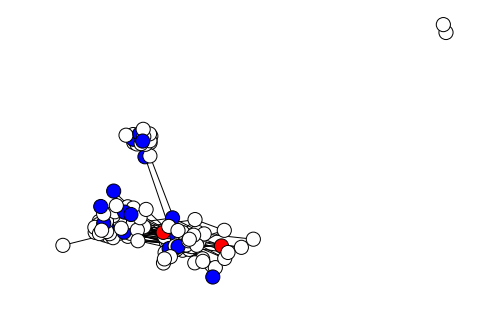

In [108]:
# on sélectionne 20% des noeuds pour lesquels on a accès à l'étiquette

random.seed(5)
proportion_nodes = 0.2
labeled_nodes = random.sample(G_fb.nodes(), int(proportion_nodes * G_fb.number_of_nodes()))

known_labels = np.zeros(n)
known_labels[labeled_nodes] = labels[labeled_nodes]

nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = known_labels, node_size=200, pos=pos)
plt.gca().collections[0].set_edgecolor("#000000") # set node border color to black

On va maintenant appliquer la propagation de label et voir les résultats

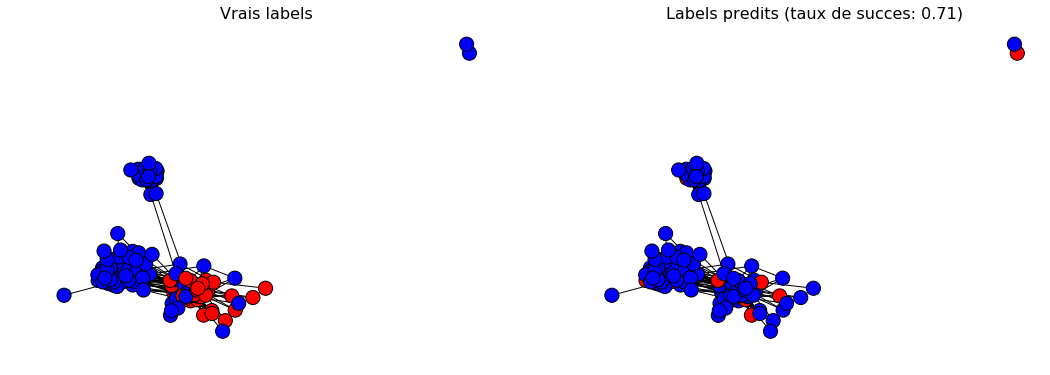

In [109]:
alpha = 0.7
L_sym = nx.normalized_laplacian_matrix(G_fb)

# on calcule la matrice de labels initiale
Y = np.zeros((n,2))
Y[known_labels==-1, 0] = 1
Y[known_labels==1, 1] = 1

# propagation de labels à faire ici
F_pred_ = np.copy(Y)
F_next = alpha*(np.eye(n)-L_sym).dot(F_pred_) + (1-alpha)*Y
while np.linalg.norm(F_pred_-F_next)>1e-3:
    F_pred_ = np.copy(F_next)
    F_next = alpha*(np.eye(n)-L_sym).dot(F_pred_) + (1-alpha)*Y
    
# labels prédits à mettre dans une variable F_pred pour affichage ci-dessous
F_pred = np.argmax(F_pred_,axis=1)*2-1
# taux de succes a mettre dans une variable pred pour affichage ci-dessous
pred = (F_pred==labels).mean()

plt.figure(figsize=(18, 6))
f, axarr = plt.subplots(1, 2, num=1)
plt.sca(axarr[0])
nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = labels, node_size=200, pos=pos)
axarr[0].set_title('Vrais labels', size=16)
plt.gca().collections[0].set_edgecolor("#000000") # set node border color to black
plt.sca(axarr[1])
nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = F_pred, node_size=200, pos=pos)
axarr[1].set_title('Labels predits (taux de succes: %.2f)' % pred, size=16)
plt.gca().collections[0].set_edgecolor("#000000") # set node border color to black

Même si on voit bien que les propriétés ont été propagées, le taux de prédiction reste faible : 0.71, alors que l'on est dans un cas favorable.